# Introduction to PyTorch

## Introduction

In this seminar, we will overview the **PyTorch** library. It is very similar to **NumPy**, with just one distinction (there are actually more, but we will focus on the most important one) — **PyTorch** can compute gradients for you.
This means you won't have to manually write the backward pass in neural networks.

### Plan:

1. Recall **NumPy** and compare its functionality with **PyTorch** operations.
2. Create tensors in **PyTorch** and explore more basic operations.
3. Work with gradients manually.
4. First neural network (Fully-connected NN).


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch
import torch.nn.functional as F
import torchvision
from torch import nn
from tqdm.notebook import tqdm

%matplotlib inline

### 1. Recall **NumPy** and compare its functionality with **PyTorch**

We can create matrices, multiply them, add, transpose, and perform various matrix operations in both libraries.


In [ ]:
# random matrix
a = np.random.rand(5, 3)
a

array([[0.23263446, 0.69044185, 0.78772675],
       [0.70655776, 0.17127899, 0.48664702],
       [0.37118766, 0.73934866, 0.81724728],
       [0.90658887, 0.27211312, 0.93646929],
       [0.43987136, 0.28655495, 0.13221405]])

In [ ]:
# array dimensions
a.shape

(5, 3)

In [ ]:
# element-wise addition
a + 5

array([[5.23263446, 5.69044185, 5.78772675],
       [5.70655776, 5.17127899, 5.48664702],
       [5.37118766, 5.73934866, 5.81724728],
       [5.90658887, 5.27211312, 5.93646929],
       [5.43987136, 5.28655495, 5.13221405]])

In [ ]:
# matrix multiplication
a @ a.T

array([[1.15134218, 0.66597274, 1.24059584, 1.13646401, 0.40432731],
       [0.66597274, 0.76538568, 0.78661136, 1.14289464, 0.42421694],
       [1.24059584, 0.78661136, 1.35230984, 1.30302805, 0.48319041],
       [1.13646401, 1.14289464, 1.30302805, 1.77292365, 0.60057224],
       [0.40432731, 0.42421694, 0.48319041, 0.60057224, 0.29308111]])

In [ ]:
# column-wise mean
a.mean(axis=-1)

array([0.57026769, 0.45482792, 0.64259453, 0.70505709, 0.28621345])

In [ ]:
# reshape
a.reshape(3, 5).shape

(3, 5)

#### Warm-up exercise 1

Using **NumPy**, calculate the sum of squares of natural numbers from 1 to 10000.

In [ ]:
# YOUR CODE

The operations in **PyTorch** are very similar but may sometimes have slightly different syntax.


In [ ]:
# random tensor
x = torch.rand(5, 3)
x

tensor([[0.8779, 0.2566, 0.5505],
        [0.1586, 0.4595, 0.0678],
        [0.4030, 0.9914, 0.9183],
        [0.8061, 0.3997, 0.5882],
        [0.3027, 0.5615, 0.4984]])

In [ ]:
# tensor dimensions
x.shape

torch.Size([5, 3])

In [ ]:
# tensor dimensions (alternate syntax)
x.size()

torch.Size([5, 3])

In [ ]:
# addition
x + 5

tensor([[5.8779, 5.2566, 5.5505],
        [5.1586, 5.4595, 5.0678],
        [5.4030, 5.9914, 5.9183],
        [5.8061, 5.3997, 5.5882],
        [5.3027, 5.5615, 5.4984]])

In [ ]:
# matrix multiplication
# refer to the documentation for various options: @, torch.mm, torch.matmul, torch.bmm
torch.matmul(x, x.transpose(1, 0))

tensor([[1.1397, 0.2945, 1.1137, 1.1341, 0.6843],
        [0.2945, 0.2409, 0.5817, 0.3514, 0.3398],
        [1.1137, 0.5817, 1.9886, 1.2612, 1.1364],
        [1.1341, 0.3514, 1.2612, 1.1556, 0.7616],
        [0.6843, 0.3398, 1.1364, 0.7616, 0.6553]])

In [ ]:
# another multiplication
x.mm(x.t())

tensor([[1.1397, 0.2945, 1.1137, 1.1341, 0.6843],
        [0.2945, 0.2409, 0.5817, 0.3514, 0.3398],
        [1.1137, 0.5817, 1.9886, 1.2612, 1.1364],
        [1.1341, 0.3514, 1.2612, 1.1556, 0.7616],
        [0.6843, 0.3398, 1.1364, 0.7616, 0.6553]])

In [ ]:
# element-wise multiplication
x * x

tensor([[0.7707, 0.0658, 0.3031],
        [0.0252, 0.2111, 0.0046],
        [0.1624, 0.9828, 0.8434],
        [0.6499, 0.1598, 0.3460],
        [0.0917, 0.3153, 0.2484]])

In [ ]:
# column-wise mean
x.mean(dim=-1)

tensor([0.5617, 0.2286, 0.7709, 0.5980, 0.4542])

In [ ]:
# tensor reshape
x.view([3, 5]).shape

torch.Size([3, 5])

In [ ]:
x.reshape([3, 5]).shape

torch.Size([3, 5])

In [ ]:
# be careful and do not use `view` for axis transposition!
x.view_as(x.t()) == x.t()

tensor([[ True, False, False, False, False],
        [False, False,  True, False, False],
        [False, False, False, False,  True]])

Examples of how operations change:

* `x.reshape([1,2,8]) -> x.view(1,2,8)`

* `x.sum(axis=-1) -> x.sum(dim=-1)`

* `x.astype("int64") -> x.type(torch.LongTensor)`

For assistance, refer to this [table](https://github.com/torch/torch7/wiki/Torch-for-Numpy-users), which will help you find the **PyTorch** equivalent of **NumPy** operations.


#### Warm-up exercise 2

Using PyTorch, calculate the sum of squares of natural numbers from 1 to 10000.


In [ ]:
# YOUR CODE

### 2. Creating Tensors in **PyTorch** and Exploring More Basic Operations


In [ ]:
# empty tensor
x = torch.empty(5, 3)
x

tensor([[-1.0872e-15,  3.0924e-41,  0.0000e+00],
        [ 0.0000e+00, -1.1518e-15,  3.0924e-41],
        [-3.9779e-17,  3.0924e-41,  2.2195e+35],
        [ 4.5580e-41,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00]])

In [ ]:
# Random tensor ~ Uniform[0, 1)
x = torch.rand(5, 3)
x

tensor([[0.1855, 0.5030, 0.8639],
        [0.3879, 0.3582, 0.7228],
        [0.2347, 0.6920, 0.0507],
        [0.3810, 0.1753, 0.7581],
        [0.2721, 0.3655, 0.2431]])

In [ ]:
# Tensor with zeros with specified dtype
x = torch.zeros(5, 3, dtype=torch.float32)
x

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [ ]:
# Constructing a tensor from a Python list
x = torch.tensor([5.5, 3])
x

tensor([5.5000, 3.0000])

In [ ]:
# Using a previously created tensor to create a tensor of ones
x1 = x.new_ones(5, 3, dtype=torch.double)
x1

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)

In [ ]:
# creating a random tensor with the same dimensions as another tensor
x = torch.randn_like(x1, dtype=torch.float)
x

tensor([[ 9.7713e-01, -3.0262e-01, -1.8407e-01],
        [-1.6838e+00, -7.1088e-01,  1.0002e+00],
        [-2.3882e+00,  8.4101e-01,  5.4790e-03],
        [ 1.5809e+00,  1.1701e+00, -5.6724e-01],
        [-7.9777e-01,  9.8703e-05, -1.0450e+00]])

In [ ]:
x = torch.rand(5, 3)
y = torch.rand(5, 3)

In [ ]:
x

tensor([[0.7778, 0.8266, 0.7164],
        [0.6085, 0.3872, 0.9500],
        [0.7164, 0.8877, 0.2837],
        [0.7987, 0.6304, 0.0518],
        [0.0974, 0.1693, 0.5829]])

In [ ]:
y

tensor([[0.8946, 0.1640, 0.5152],
        [0.1000, 0.5674, 0.5686],
        [0.9528, 0.9837, 0.5304],
        [0.5406, 0.6813, 0.6985],
        [0.7237, 0.2729, 0.5225]])

In [ ]:
# Addition
x + y

tensor([[1.6724, 0.9906, 1.2316],
        [0.7085, 0.9546, 1.5186],
        [1.6692, 1.8713, 0.8141],
        [1.3393, 1.3118, 0.7503],
        [0.8211, 0.4422, 1.1054]])

In [ ]:
z = torch.add(x, y)
z

tensor([[1.6724, 0.9906, 1.2316],
        [0.7085, 0.9546, 1.5186],
        [1.6692, 1.8713, 0.8141],
        [1.3393, 1.3118, 0.7503],
        [0.8211, 0.4422, 1.1054]])

In [ ]:
torch.add(x, y, out=x)
x

tensor([[1.6724, 0.9906, 1.2316],
        [0.7085, 0.9546, 1.5186],
        [1.6692, 1.8713, 0.8141],
        [1.3393, 1.3118, 0.7503],
        [0.8211, 0.4422, 1.1054]])

In [ ]:
# Added a dimension at the beginning, analogous to broadcasting
x.unsqueeze(0).size()

torch.Size([1, 5, 3])

In [ ]:
# Removed one singleton dimension
x.unsqueeze(0).unsqueeze(1).squeeze(0).size()

torch.Size([1, 5, 3])

In [ ]:
# Removed all singleton dimensions
x.unsqueeze(0).unsqueeze(1).squeeze().size()

torch.Size([5, 3])

In [ ]:
# Operations without '_' do not modify the tensor but create a copy
x.unsqueeze(0)
x.size()

torch.Size([5, 3])

In [ ]:
# Operations with '_' modify the tensor
x.unsqueeze_(0)
x.size()

torch.Size([1, 5, 3])

We can perform regular slicing and convert matrices between **PyTorch** and **NumPy**:


In [ ]:
a = np.ones((3, 5))
x = torch.ones((3, 5))
np.allclose(x.numpy(), a)

True

In [ ]:
np.allclose(x.numpy()[:, 1], a[:, 1])

True

In [ ]:
torch.from_numpy(x.numpy())

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

### 3. Working with Gradients Manually

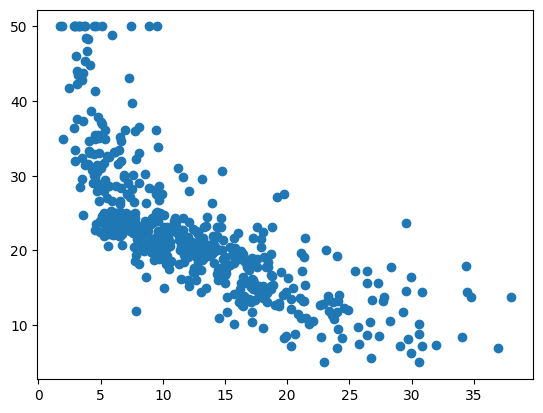

In [ ]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
plt.scatter(data[:, -1], target);

In **PyTorch**, when creating a tensor object, there is an option to specify whether to compute gradients for it using the `requires_grad` parameter. When `requires_grad=True`, we inform the framework that we want to track all tensors derived from it and that autograd should record operations on this tensor. If these functions are differentiable, the tensor will have a `.grad` attribute containing the gradient value.


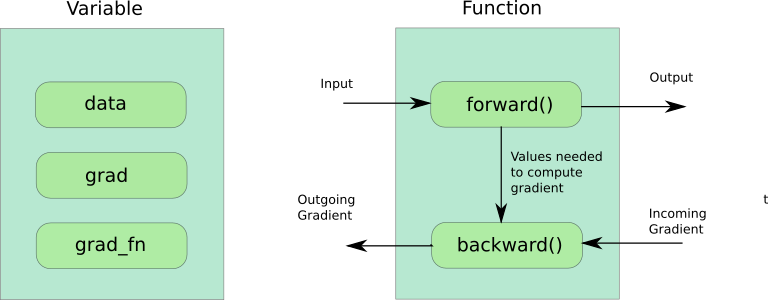

If the `.backward()` method is applied to the resulting tensor, the framework will compute gradients through the entire chain for all tensors with `requires_grad=True`.


In [ ]:
w = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)

x = torch.tensor(data[:, -1] / data[:, -1].max(), dtype=torch.float32)
y = torch.tensor(target, dtype=torch.float32)

# Created tensors without w.grad=True
assert w.grad is None
assert b.grad is None

In [ ]:
x.size(), y.size()

(torch.Size([506]), torch.Size([506]))

In [ ]:
y_pred = w * x + b
loss = torch.mean((y_pred - y) ** 2)
loss.backward()

In [ ]:
# Gradient values in corresponding fields appeared
assert w.grad is not None
assert b.grad is not None

print(f"dL/dw = {w.grad}")
print(f"dL/db = {b.grad}")


dL/dw = tensor([-12.3550])
dL/db = tensor([-44.7428])


To access the values in a tensor, use the `.data` attribute:
```python
tensor_value = some_tensor.data


In [ ]:
w.data, w.grad

(tensor([0.1156]), tensor([-12.3550]))

In [ ]:
w

tensor([0.1156], requires_grad=True)

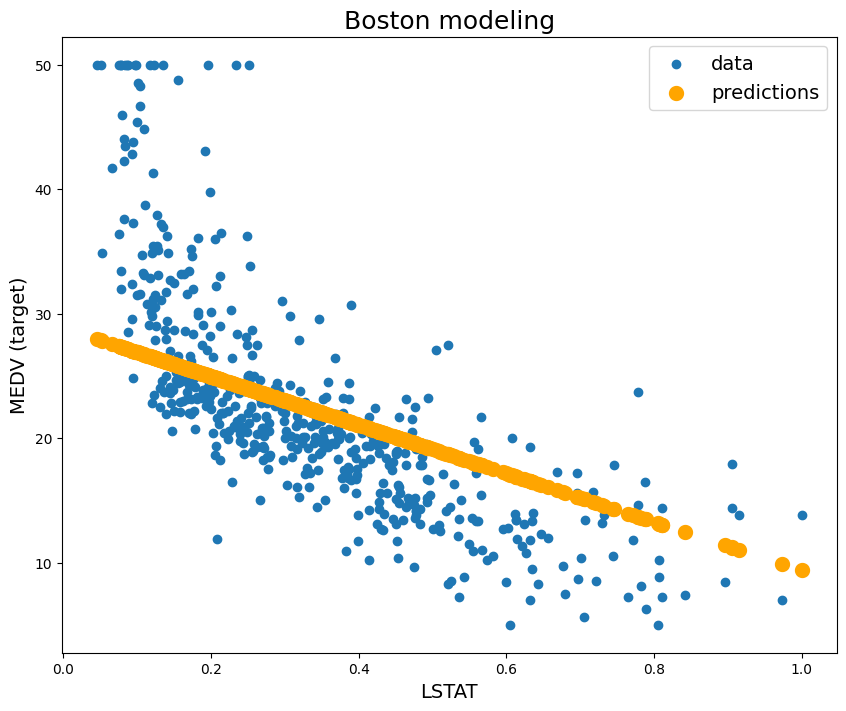

loss =  48.22511


In [ ]:
from IPython.display import clear_output

for i in range(300):
    y_pred = w * x + b
    # Try polynomial regression in this prediction and calculate gradients afterward
    loss = torch.mean((y_pred - y) ** 2)
    loss.backward()

    # Perform a gradient descent step with lr = 0.05
    w.data -= 0.05 * w.grad
    b.data -= 0.05 * b.grad

    # Reset gradients to zero to compute them again on the next step without accumulation
    w.grad.data.zero_()
    b.grad.data.zero_()

    # Plot figures
    if (i + 1) % 5 == 0:
        clear_output(True)
        plt.figure(figsize=(10, 8))
        plt.scatter(x.data.numpy(), y.data.numpy(), label="data")
        plt.scatter(
            x.data.numpy(),
            y_pred.data.numpy(),
            color="orange",
            linewidth=5,
            label="predictions",
        )
        plt.xlabel("LSTAT", fontsize=14)
        plt.ylabel("MEDV (target)", fontsize=14)
        plt.title("Boston modeling", fontsize=18)
        plt.legend(fontsize=14)
        plt.show()

        print("loss = ", loss.data.numpy())
        if loss.data.numpy() < 0.1:
            print("Done!")
            break


### 4. First Neural Network

To understand how to train neural networks in **PyTorch**, you need to master three things:

1. How to create batches and feed them into the network.
2. How to define the network architecture.
3. How to write the training loop and track metrics.

#### How to create batches and feed them into the neural network

To be able to iterate through data and apply transformations to them (e.g., augmentations, which you'll learn about later), you need to create your class inherited from `torch.utils.data.Dataset`.

Such a class **should have** three methods:

- `__init__` — initializes the class fields (e.g., the path to the folder with training object files).
- `__len__` — returns information about how many objects we have in the dataset.
- `__getitem__` — returns a sample and its target by index.

Let's write such a class ourselves, using random values as data.

In [ ]:
class RandomDataset(torch.utils.data.Dataset):
    """
    Our random dataset
    """

    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return {
            "sample": torch.tensor(self.x[idx, :], dtype=torch.float),
            "target": self.y[idx],
        }

In [ ]:
x = np.random.rand(1000, 5)
y = np.random.rand(1000)

In [ ]:
our_dataset = RandomDataset(x, y)

In [ ]:
our_dataset.__getitem__(1)

{'sample': tensor([0.4385, 0.1459, 0.2935, 0.9663, 0.8488]),
 'target': 0.8775065961281371}

To obtain batches from data in PyTorch, a DataLoader is used, which takes as input a class inherited from `torch.utils.data.Dataset`. Let's look at an example:



In [ ]:
dataloader = torch.utils.data.DataLoader(our_dataset, batch_size=4)

They are used with it as follows:

In [ ]:
batch = next(iter(dataloader))

print(f"Sample:\n{batch['sample']}")
print(f"Target:\n{batch['target']}")

Sample:
tensor([[0.5462, 0.7764, 0.7119, 0.4132, 0.6973],
        [0.4385, 0.1459, 0.2935, 0.9663, 0.8488],
        [0.8572, 0.5000, 0.4637, 0.8505, 0.3231],
        [0.8889, 0.6515, 0.9476, 0.8221, 0.3193]])
Target:
tensor([0.9161, 0.8775, 0.8730, 0.5613], dtype=torch.float64)


#### How to create a neural network


To create neural networks in high-level PyTorch, the `torch.nn` module is used. A neural network should inherit from the `nn.Module` class. Here's an example of how it might look:

```python
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5)
        self.conv2 = nn.Conv2d(20, 20, 5)

    def forward(self, x):
       x = F.relu(self.conv1(x))
       return F.relu(self.conv2(x))
```

As we can see from this example, the class **should have** a forward method, which defines the forward pass of the neural network. It's also evident that the nn module contains the implementation of most layers, while the nn.functional module contains activation functions.

There's another way to create a neural network, and let's explore it in practice:

In [ ]:
model = nn.Sequential()  # Create an empty model to which layers will be added
model.add_module("l1", nn.Linear(5, 30))  # Add a layer with 5 input neurons and 30 output neurons
model.add_module("l2", nn.ReLU())  # Add an activation function
model.add_module("l3", nn.Linear(30, 1))  # Add a layer with 30 input neurons and 1 output neuron

# Alternative approach
another_model = nn.Sequential(nn.Linear(5, 30), nn.ReLU(), nn.Linear(30, 1))

In [ ]:
y_pred = model(batch["sample"])  # Obtained predictions from the model

#### How to write a training loop and track metrics

Now, let's put together data loading, model creation, and train on the MNIST dataset that is readily available for us.


In [ ]:
# Use the ready-made class from PyTorch to load training data
mnist_train = torchvision.datasets.MNIST(
    "./mnist/", train=True, download=True, transform=torchvision.transforms.ToTensor()
)
mnist_val = torchvision.datasets.MNIST(
    "./mnist/", train=False, download=True, transform=torchvision.transforms.ToTensor()
)

# Since it's already inherited from the Dataset class, it can be directly wrapped in a DataLoader
train_dataloader = torch.utils.data.DataLoader(
    mnist_train, batch_size=4, shuffle=True, num_workers=1
)

val_dataloader = torch.utils.data.DataLoader(
    mnist_val, batch_size=4, shuffle=False, num_workers=1
)


100%|██████████| 9912422/9912422 [00:00<00:00, 113261244.87it/s]

Extracting ./mnist/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 24576119.66it/s]


Extracting ./mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 30606435.58it/s]


Extracting ./mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 11232623.09it/s]


Extracting ./mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



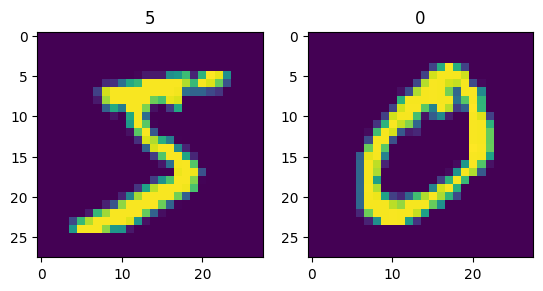

In [ ]:
# Let's look at what we're working with
for i in [0, 1]:
    plt.subplot(1, 2, i + 1)
    plt.imshow(mnist_train[i][0].squeeze(0).numpy().reshape([28, 28]))
    plt.title(str(mnist_train[i][1]))
plt.show()


In [ ]:
model = nn.Sequential(
    nn.Flatten(),  # Transform the 28x28 image into a vector of size 784
    nn.Linear(28 * 28, 128),  # Linear layer transforming a vector of size 784 into a vector of size 128
    nn.ReLU(),  # Non-linearity
    nn.Linear(128, 10),  # Linear layer transforming a vector of size 128 into a vector of size 10
)

# Create an optimizer that will update the model weights
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)


Model weights are stored as matrices and look like this:

In [ ]:
[x for x in model.named_parameters()]

[('1.weight',
  Parameter containing:
  tensor([[ 1.1802e-02,  2.5838e-03, -3.1591e-02,  ..., -3.4311e-02,
           -4.5556e-03, -1.1638e-03],
          [-2.0199e-02,  2.1986e-03,  3.1093e-02,  ..., -3.4112e-02,
            7.0197e-05, -3.5628e-02],
          [ 1.8605e-02, -3.4087e-02, -7.2568e-03,  ..., -2.4734e-02,
            2.6424e-03, -2.6265e-03],
          ...,
          [-3.5064e-02, -1.6941e-02,  1.2117e-02,  ...,  1.3387e-02,
            1.9854e-02,  1.3807e-02],
          [-1.6130e-02, -1.5290e-02,  8.7667e-03,  ...,  2.3794e-02,
           -2.6146e-02,  3.1920e-02],
          [-2.6388e-02,  3.1690e-02, -7.3097e-03,  ...,  1.2506e-02,
           -4.7098e-03,  2.9577e-02]], requires_grad=True)),
 ('1.bias',
  Parameter containing:
  tensor([-0.0102, -0.0289, -0.0140, -0.0068,  0.0138, -0.0156, -0.0073, -0.0124,
          -0.0001,  0.0162, -0.0235,  0.0066,  0.0346,  0.0199,  0.0227, -0.0077,
          -0.0232, -0.0309,  0.0108,  0.0337, -0.0306, -0.0087, -0.0248,  0.0232,


Instead of manually plotting graphs in `matplotlib` every time, we will track metrics in a semi-automatic mode using [wandb](https://wandb.ai). To do this, register on the website, install, and log in (it's worth it).

Note: Besides this tool, there are other alternatives like Tensorboard (minimalistic, works locally), MLFlow (less visually appealing but open source), Neptune (similar to W&B).


In [ ]:
!pip install wandb --upgrade --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.1/254.1 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.3 MB/s eta 0:00:00


In [ ]:
# Install wandb
# !pip install wandb --upgrade --quiet
import wandb

# Log in to your user account (you need to enter the key from the wandb.ai settings via the console)
wandb.login()

# Initialize the project
wandb.init(project="pytorch-demo")

# Save the model's grid parameters in wandb + request to track the grid gradients
wandb.watch(model)


You can follow the link and monitor our model right during training!


In [ ]:
# We'll have a total of 5 epochs (we'll go through all batches from the training set 5 times)
for epoch in range(5):
    for x_train, y_train in tqdm(train_dataloader):  # Take a batch from the training loader
        y_pred = model(x_train)  # Make predictions
        loss = F.cross_entropy(y_pred, y_train)  # Calculate loss
        loss.backward()  # Calculate gradients with backward pass
        optimizer.step()  # Update network parameters
        optimizer.zero_grad()  # Reset calculated parameter gradients

    if epoch % 2 == 0:
        val_loss = []  # We'll store the **average per batch** loss here
        val_accuracy = []
        with torch.no_grad():  # For validation, we forbid the framework from computing gradients for parameters
            for x_val, y_val in tqdm(val_dataloader):  # Take a batch from the validation loader
                y_pred = model(x_val)  # Make predictions
                loss = F.cross_entropy(y_pred, y_val)  # Calculate loss
                val_loss.append(loss.numpy())  # Add to the array
                val_accuracy.extend(
                    (torch.argmax(y_pred, dim=-1) == y_val).numpy().tolist()
                )

        # Log metrics on wandb and automatically view the graphs
        wandb.log(
            {
                "mean val loss": np.mean(val_loss),
                "mean val accuracy": np.mean(val_accuracy),
            }
        )

        # Print metrics
        print(
            f"Epoch: {epoch}, loss: {np.mean(val_loss)}, accuracy: {np.mean(val_accuracy)}"
        )


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 0, loss: 0.12197370827198029, accuracy: 0.963


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 2, loss: 0.09390398859977722, accuracy: 0.9717


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 4, loss: 0.08953408896923065, accuracy: 0.9742


### Additional Resources

* [A good book about PyTorch](https://isip.piconepress.com/courses/temple/ece_4822/resources/books/Deep-Learning-with-PyTorch.pdf)
* [Using PyTorch on GPU](https://pytorch.org/docs/master/notes/cuda.html)
* [PyTorch in 60 minutes](http://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)
* [How automatic differentiation works in PyTorch](https://videolectures.net/deeplearning2017_johnson_automatic_differentiation/)
